In [126]:
import wasaga_tools
import flopy
import shutil
from pathlib import Path
import numpy as np

import importlib
importlib.reload(wasaga_tools)

<module 'wasaga_tools' from 'c:\\Users\\swan47\\Documents\\GitHub\\wasaga_model\\wasaga_2d\\wasaga_tools.py'>

# SRP

In [127]:
################### Model Parameters   ##############################
my_params = {}
my_params['name'] = 'test_wasaga_2'
## mt3dGcg
cclose=my_params['cclose'] = 1e-5
## RCT

my_params['hk'] = 6.9
my_params['vk'] = 0.1

my_params['porosity'] = 0.35
my_params['sy'] = 0.33
my_params['ss'] = 0.0002
my_params['la'] = 0.2
my_params['trpt'] = 0.1
my_params['trpv'] = 0.1
my_params['dmcoef'] = 3.7E-10 ####
my_params['sconc'] = 20

#Species ID
sp_ID = {}
#sp_ID['Cl-'] = 1
sp_ID['SRP'] = 1
my_params['sp_ID'] = sp_ID

#Species Name
sp_name = {}
#sp_name[1] = 'Cl-'
sp_name[1] = 'SRP'
my_params['sp_name'] = sp_name


## P lens
my_params['perlen'] = [1]+[30,92,31,212]*25 +[365]*5+[365*5]*5+[365*4]+[185,30,30,120]


## Wel data
wel_data = {}
#last_wel_id = len(my_params['perlen'])-1
for y in range(25):
    p = (y)*4 +2
    wel_data[p] = [[50,0,15,0.0075]]
    p += 1
    wel_data[p] = [[50,0,15,0.075]]
    p += 1
    wel_data[p] = [[50,0,15,0.0075]]
    p += 1
    wel_data[p] = [[50,0,15,0.0]]
    p += 1

wel_data[p] = [[50,0,15,0]]
my_params['wel_data'] = wel_data


# Mt3dSsm 
ssm_data = {}
itype = flopy.mt3d.Mt3dSsm.itype_dict()

for y in range(25):
    p = (y)*4 +2
    ssm_data[p] = [(50, 0, 15, 3000.0, itype['WEL'])]
    p += 1
    ssm_data[p] = [(50, 0, 15, 3000.0, itype['WEL'])]
    p += 1
    ssm_data[p] = [(50, 0, 15, 3000.0, itype['WEL'])]
    p += 1
    ssm_data[p] = [(50, 0, 15, 3000.0, itype['WEL'])]
    p += 1
ssm_data[p] = [(50, 0, 15, 0.0, itype['WEL'])]
my_params['ssm_data'] = ssm_data


#Mt3dBtn
mixelm=my_params['mixelm'] = 0 # HMOC
my_params['isothm'] = 3 # Langmuir
my_params['sp1'] = 0.0001 ##  0.1 mg/L  => 1e5 ug/m3
my_params['sp2'] = 0.0001  ##  maximum soil adsorption value = 100 ug/g => 1e5 ug/kg

# Rch
my_params['rech'] = 0.5/365 #0.5/365 ## 500mm/year

# dt0
my_params['dt0'] = 0.1
################################################################

base_model_my_params = my_params

In [129]:
delv = np.array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.25, 0.25, 0.25,
       0.25, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

In [130]:
delv

array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.25, 0.25, 0.25,
       0.25, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

# Test

In [131]:
wasaga_tools.execute_wasaga_draw(ws = ws)

Script executed successfully.
Output:
wasaga



found 'rch' in modflow model, resetting crch to 0.0
FloPy is using the following executable to run the model: ..\..\flopy\bin\swtv4.exe

                                  SEAWAT Version 4
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 4.00.05 10/19/2012                      

Incorporated MODFLOW Version: 1.18.01 06/20/2008                      
Incorporated MT3DMS  Version: 5.20    10/30/2006                      


 This program is public domain and is released on the
 condition that neither the U.S. Geological Survey nor
 the United States Government may be held liable for any
 damages resulting from their authorized or unauthorized
 use.


 Using NAME file: wasaga.nam                                                                                                                                                                                              
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2023/11/30 15:

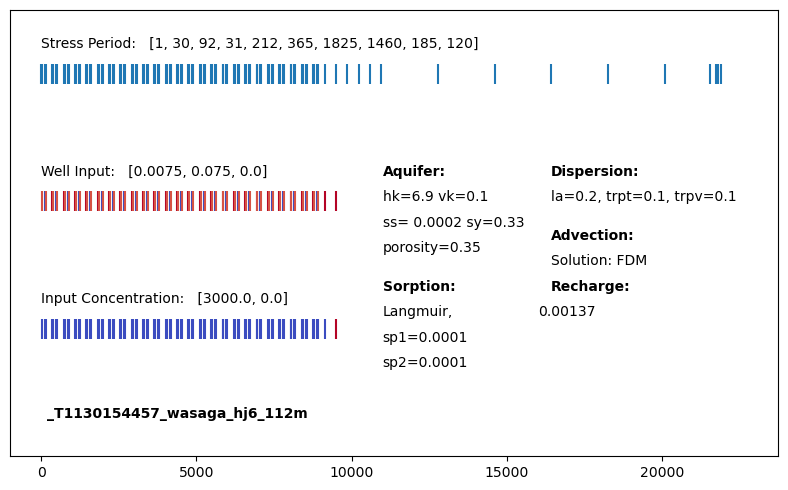

In [128]:


ws = wasaga_tools.run_wasaga(my_params=my_params)
shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
wasaga_tools.execute_wasaga_draw(ws = ws)

In [ ]:
import sys
import os
def get_desktop_path():
    if sys.platform == 'win32':
        desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
    else:  # 'darwin' assumes MacOS
        desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')
    return desktop

def create_folder_on_desktop(folder_name):
    desktop = get_desktop_path()
    folder_path = os.path.join(desktop, folder_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return folder_path


def copy_and_rename_file(src_file_path, dest_folder_path, new_name):
    if not os.path.isfile(src_file_path):
        print(f"Source file does not exist: {src_file_path}")
        return False
    
    # Define the destination file path with the new name
    dest_file_path = os.path.join(dest_folder_path, new_name)
    
    # Copy the file to the new destination
    shutil.copy(src_file_path, dest_file_path)
    print(f"File {src_file_path} copied and renamed to {dest_file_path}")
    return True


def copy_files(new_name):
    # Replace 'path_to_ws' with the actual path to your 'ws' directory
    path_to_ws = "path_to_ws"
    file_to_copy = "SRP_mass.png"
    output_folder_name = "_output"
    conc_folder_name = "conc"

    # Construct the full path to the source file
    src_file_path = os.path.join(ws, output_folder_name, file_to_copy)
    
    # Create 'conc' folder on desktop and get the path
    conc_folder_path = create_folder_on_desktop(conc_folder_name)
    
    # Copy the file from the source to the 'conc' folder on the desktop
    copy_and_rename_file(src_file_path, conc_folder_path,new_name)



def copy_files_0(new_name):
    # Replace 'path_to_ws' with the actual path to your 'ws' directory
    path_to_ws = "path_to_ws"
    file_to_copy = "_my_params.png"
    output_folder_name = "_output"
    conc_folder_name = "conc"

    # Construct the full path to the source file
    src_file_path = os.path.join(ws, output_folder_name, file_to_copy)
    
    # Create 'conc' folder on desktop and get the path
    conc_folder_path = create_folder_on_desktop(conc_folder_name)
    
    # Copy the file from the source to the 'conc' folder on the desktop
    copy_and_rename_file(src_file_path, conc_folder_path,new_name)

In [124]:
my_params['sp1'] = 0.0008
my_params['la'] = 5
my_params['hk'] = 12
base_model_my_params = my_params

# HK

In [ ]:
import numpy as np
import os

In [ ]:
np.logspace(0.1,2,20).round(1)

In [ ]:
hks = np.array([  1.3,   1.6,   2. ,   2.5,   3.2,   4. ,   5. ,   6.3,   7.9,
        10. ,  12,  15.8,  20. ,  25.1,  31.6,  39.8,  50.1,  63.1,
        79.4, 100. ])

In [ ]:
%%capture
c = 0

my_params = base_model_my_params
for h in hks:
    my_params['hk'] = h
    my_params['vk'] = 0.1

    ws = wasaga_tools.run_wasaga(my_params=my_params)

    shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
    wasaga_tools.execute_wasaga_draw(ws = ws)
    copy_files_0('{:02d}__my_params_h_{:.1e}.png'.format(c,h))
    copy_files('{:02d}_h_{:.1e}_mass.png'.format(c,h))
    c += 1

In [ ]:
# BASE sp1 = 0.0008

In [ ]:
np.logspace(-4,-2,20)

In [ ]:
sp1s = np.array([0.0001    , 0.00012743, 0.00016238, 0.00020691, 0.00026367,
       0.00033598, 0.00042813, 0.00054556, 0.00069519, 0.0008,
       0.00112884, 0.00143845, 0.00183298, 0.00233572, 0.00297635,
       0.00379269, 0.00483293, 0.00615848, 0.0078476 , 0.01      ])

# SP1

In [ ]:
# %%capture

my_params = base_model_my_params

c = 0
for k in sp1s:
    print(k)
    my_params['sp1'] = k

    ws = wasaga_tools.run_wasaga(my_params=my_params)

    shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
    wasaga_tools.execute_wasaga_draw(ws = ws)
    copy_files_0('{:02d}__my_params_k_{:.1e}.png'.format(c,k))
    copy_files('{:02d}_k_{:.1e}_mass.png'.format(c,k))
    c += 1

# LA

In [105]:
np.logspace(-1,1.5,20)

array([ 0.1       ,  0.13538762,  0.18329807,  0.24816289,  0.33598183,
        0.45487779,  0.61584821,  0.83378222,  1.12883789,  1.52830673,
        2.06913808,  2.80135676,  3.79269019,  5.13483291,  6.95192796,
        9.41204967, 12.74274986, 17.2521055 , 23.35721469, 31.6227766 ])

In [110]:
las = np.array([ 0.1 ,  0.13538762,  0.18329807,  0.24816289,  0.33598183,
        0.45487779,  0.61584821,  0.83378222,  1.12883789,  1.52830673,
        2.06913808,  2.80135676,  3.79269019,  5.0,  6.95192796,
        9.41204967, 12.74274986, 17.2521055 , 23.35721469, 31.6227766 ])

In [122]:
%%capture

my_params = base_model_my_params
c = 0
for k in las:
    my_params['la'] = k
    ws = wasaga_tools.run_wasaga(my_params=my_params)

    shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
    wasaga_tools.execute_wasaga_draw(ws = ws)
    copy_files_0('{:02d}__my_params_k_{:.1e}.png'.format(c,k))
    copy_files('{:02d}_k_{:.1e}_mass.png'.format(c,k))
    c += 1

# SP2

In [ ]:
%%capture

my_params = base_model_my_params

c = 0
for k in np.logspace(-5,-1,20):
    my_params['sp2'] = k

    ws = wasaga_tools.run_wasaga(my_params=my_params)

    shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
    wasaga_tools.execute_wasaga_draw(ws = ws)
    #copy_files_0('{:02d}__my_params_k_{:.1e}.png'.format(c,k))
    copy_files('{:02d}_k_{:.1e}_mass.png'.format(c,k))
    c += 1

# Merge png

In [123]:

from PIL import Image
import os

# Set the path to the folder containing the PNG figures
conc_folder_path = create_folder_on_desktop('conc')
folder_path = conc_folder_path

# Get a list of all the PNG files in the folder
file_list = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])

# Create a new image with the size of the grid
grid_size = (5, 4)
grid_image = Image.new('RGB', (grid_size[0]*500, grid_size[1]*400))

# Loop through the files and paste them into the grid
for i, file_name in enumerate(file_list):
    # Open the file
    file_path = os.path.join(folder_path, file_name)
    image = Image.open(file_path)

    # Resize the image to fit in the grid
    image = image.resize((500, 400))

    # Calculate the position of the image in the grid
    x = (i % grid_size[0]) * 500
    y = (i // grid_size[0]) * 400

    # Paste the image into the grid
    grid_image.paste(image, (x, y))

# Save the grid image
grid_image.save(Path(folder_path) /"grid.png")

In [ ]:
%%capture
for h in [6.9]:
    my_params['hk'] = h
    my_params['vk'] = h/10
    for kd in [0.012]:
        my_params['sp1'] = kd
        #my_params['name'] = 'Linear_hk{:02d}_kd{:03d}'.format(int(h),int(kd*1000))
        for rech in [0,0.5/365,1.5/365]:
            my_params['rech'] = rech
            my_params['name'] = 'Linear_hk{:02d}_rech{:03d}'.format(int(h),int(rech*1000))

            ws = wasaga_tools.run_wasaga(my_params=my_params)

            shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
            wasaga_tools.execute_wasaga_draw(ws = ws)

# Cl-

In [ ]:
################### Model Parameters   ##############################
my_params = {}
my_params['name'] = 'test_wasaga_cl'
## mt3dGcg
cclose=my_params['cclose'] = 1e-5
## RCT

my_params['hk'] = 12.9
my_params['vk'] = 1.29

my_params['porosity'] = 0.35
my_params['sy'] = 0.33
my_params['ss'] = 0.0002
my_params['la'] = 0.2
my_params['trpt'] = 0.1
my_params['trpv'] = 0.1
my_params['dmcoef'] = 3.7E-10 ####
my_params['sconc'] = 0

#Species ID
sp_ID = {}
#sp_ID['Cl-'] = 1
sp_ID['Cl'] = 1
my_params['sp_ID'] = sp_ID

#Species Name
sp_name = {}
#sp_name[1] = 'Cl-'
sp_name[1] = 'Cl'
my_params['sp_name'] = sp_name


## P lens
my_params['perlen'] = [1,1]+[90,90,90,90]


## Wel data
wel_data = {}
#last_wel_id = len(my_params['perlen'])-1
for y in range(25):
    p = 1
    wel_data[p] = [[50,0,15,1.5]]

    p += 1

wel_data[p] = [[50,0,15,0]]
my_params['wel_data'] = wel_data


# Mt3dSsm 
ssm_data = {}
itype = flopy.mt3d.Mt3dSsm.itype_dict()

for y in range(25):
    p = 1
    ssm_data[p] = [(50, 0, 15, 500.0, itype['WEL'])]

    p += 1
ssm_data[p] = [(50, 0, 15, 0.0, itype['WEL'])]
my_params['ssm_data'] = ssm_data


#Mt3dBtn
mixelm=my_params['mixelm'] = 3 # HMOC
my_params['isothm'] = 0 #No Sorption
my_params['sp1'] = 0.0001 ##  0.1 mg/L  => 1e5 ug/m3
my_params['sp2'] = 0.0001  ##  maximum soil adsorption value = 100 ug/g => 1e5 ug/kg

# Rch

my_params['rech'] = 0 ## 500mm/year


# dt0 

my_params['dt0'] = 0.0
################################################################

In [ ]:
for h in [0.69,6.9]:
    my_params['hk'] = h
    my_params['vk'] = h/10
    my_params['name'] = 'hk69'

    ws = wasaga_tools.run_wasaga(my_params=my_params)

    shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
    wasaga_tools.execute_wasaga_draw(ws = ws)
    copy_files('h_{:.1e}.png'.format(h))

In [ ]:
import sys
import os
def get_desktop_path():
    if sys.platform == 'win32':
        desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
    else:  # 'darwin' assumes MacOS
        desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')
    return desktop

def create_folder_on_desktop(folder_name):
    desktop = get_desktop_path()
    folder_path = os.path.join(desktop, folder_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    return folder_path


def copy_and_rename_file(src_file_path, dest_folder_path, new_name):
    if not os.path.isfile(src_file_path):
        print(f"Source file does not exist: {src_file_path}")
        return False
    
    # Define the destination file path with the new name
    dest_file_path = os.path.join(dest_folder_path, new_name)
    
    # Copy the file to the new destination
    shutil.copy(src_file_path, dest_file_path)
    print(f"File {src_file_path} copied and renamed to {dest_file_path}")
    return True


def copy_files(new_name):
    # Replace 'path_to_ws' with the actual path to your 'ws' directory
    path_to_ws = "path_to_ws"
    file_to_copy = "SRP_mass.png"
    output_folder_name = "_output"
    conc_folder_name = "conc"

    # Construct the full path to the source file
    src_file_path = os.path.join(ws, output_folder_name, file_to_copy)
    
    # Create 'conc' folder on desktop and get the path
    conc_folder_path = create_folder_on_desktop(conc_folder_name)
    
    # Copy the file from the source to the 'conc' folder on the desktop
    copy_and_rename_file(src_file_path, conc_folder_path,new_name)



def copy_files_0(new_name):
    # Replace 'path_to_ws' with the actual path to your 'ws' directory
    path_to_ws = "path_to_ws"
    file_to_copy = "_my_params.png"
    output_folder_name = "_output"
    conc_folder_name = "conc"

    # Construct the full path to the source file
    src_file_path = os.path.join(ws, output_folder_name, file_to_copy)
    
    # Create 'conc' folder on desktop and get the path
    conc_folder_path = create_folder_on_desktop(conc_folder_name)
    
    # Copy the file from the source to the 'conc' folder on the desktop
    copy_and_rename_file(src_file_path, conc_folder_path,new_name)

In [ ]:
import flopy.utils.binaryfile as bf

In [ ]:
import pickle
model = pickle.load( open( Path(ws)/Path('_output') / 'model.pickle', "rb"  ))

In [ ]:
delr = np.concatenate([np.repeat(2,25),np.repeat(1,70),np.repeat(2,15)])

In [ ]:
delv = np.array([0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.25, 0.25, 0.25,
       0.25, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
       0.1 , 0.1 , 0.1 , 0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

In [ ]:
plot_distance_mass(ws,'wasaga',model)

In [ ]:
shutil.copy('wasaga_draw.py',Path(ws) / 'wasaga_draw.py')
wasaga_tools.execute_wasaga_draw(ws = ws)
copy_files('{:02d}_h_{:.1e}_mass.png'.format(c,h))

In [ ]:
model = flopy.modflow.Modflow.load('wasaga.nam', model_ws=Path("C:\\Users\\swan47\\AppData\\Local\\Temp\\_T1110165212_wasaga_hxnz6x86"))

In [ ]:
response = requests.get("https://api.qa.datastream.org/v1/odata/v4")

In [ ]:
print(response.status_code)